In [1]:
# pip install dlc2kinematics

In [2]:
import dlc2kinematics as dlck
import pandas as pd
import numpy as np

In [3]:
# load data
df, bodyparts, scorer = dlck.load_data('F:\\G3\\W01\\42136_RF\\42136_RF_W01VideoProcessed2021-12-07T12_11_59DLC_resnet50_Dystonia_TestApr21shuffle1_500000_filtered.h5')

In [130]:
# create a dataframe with the velocity (in x and y) of the 'nose'
df_vel_nose_tailbase = dlck.compute_velocity(df,bodyparts=['nose', 'tailbase'])

In [5]:
# show the dataframe 
df_vel_nose_tailbase

scorer    DLC_resnet50_Dystonia_TestApr21shuffle1_500000                       \
bodyparts                                           nose                        
coords                                                 x         y likelihood   
0                                               0.753365  5.572121   0.999991   
1                                               0.753365  5.572121   0.999922   
2                                               0.284904  4.572838   0.999950   
3                                               0.000000  5.358597   0.999933   
4                                              -0.192986  6.799973   0.999900   
...                                                  ...       ...        ...   
18859                                          -6.499466  0.200775   0.999897   
18860                                          -6.638123  0.217621   0.999689   
18861                                          -6.444443  0.000000   0.998104   
18862                                          -5.532776 -0.689331   0.999840   
18863                                          -5.532776 -0.689331   0.994408   

scorer                                        
bodyparts      tailbase                       
coords                x         y likelihood  
0         -2.683273e-14  2.394772   0.999942  
1          0.000000e+00  2.394772   0.999990  
2         -8.764801e-01  3.957558   0.999995  
3         -1.132935e+00  4.234097   0.999959  
4         -7.757187e-01  3.850792   0.999990  
...                 ...       ...        ...  
18859     -7.954437e+00 -2.924957   0.999962  
18860     -7.679153e+00  0.000000   0.999947  
18861     -7.576782e+00  0.000000   0.999951  
18862     -8.812607e+00 -0.260498   0.999967  
18863     -8.812607e+00 -0.260498   0.999988  

[18864 rows x 6 columns]

In [6]:
# change columns names
df_vel_nose_tailbase.columns = ['nose v(x)', 'nose v(y)', 'nose likelihood', 'tailbase v(x)', 'tailbase v(y)', 'tailbase likelihood']
# show the dataframe
df_vel_nose_tailbase

,nose v(x),nose v(y),nose likelihood,tailbase v(x),tailbase v(y),tailbase likelihood
0,0.753365,5.572121,0.999991,-2.683273e-14,2.394772,0.999942
1,0.753365,5.572121,0.999922,0.000000e+00,2.394772,0.999990
2,0.284904,4.572838,0.999950,-8.764801e-01,3.957558,0.999995
3,0.000000,5.358597,0.999933,-1.132935e+00,4.234097,0.999959
4,-0.192986,6.799973,0.999900,-7.757187e-01,3.850792,0.999990
...,...,...,...,...,...,...
18859,-6.499466,0.200775,0.999897,-7.954437e+00,-2.924957,0.999962
18860,-6.638123,0.217621,0.999689,-7.679153e+00,0.000000,0.999947
18861,-6.444443,0.000000,0.998104,-7.576782e+00,0.000000,0.999951
18862,-5.532776,-0.689331,0.999840,-8.812607e+00,-0.260498,0.999967


In [7]:
import math

In [8]:
#convert the values to float
for col in df_vel_nose_tailbase:
    df_vel_nose_tailbase[col] = pd.to_numeric(df_vel_nose_tailbase[col], downcast="float")

In [9]:
# create two new columns with v = vx**2 + vy**2, for both the nose and the tailbase

velocity_nose = np.sqrt(df_vel_nose_tailbase['nose v(x)']**2+df_vel_nose_tailbase['nose v(y)']**2)
velocity_tailbase = np.sqrt(df_vel_nose_tailbase['tailbase v(x)']**2+df_vel_nose_tailbase['tailbase v(y)']**2)
df_vel_nose_tailbase['Velocity nose (px/frame)'] = velocity_nose
df_vel_nose_tailbase['Velocity tailbase (px/frame)'] = velocity_tailbase

In [10]:
# show the dataframe
df_vel_nose_tailbase

,nose v(x),nose v(y),nose likelihood,tailbase v(x),tailbase v(y),tailbase likelihood,Velocity nose (px/frame),Velocity tailbase (px/frame)
0,0.753365,5.572121,0.999991,-2.683273e-14,2.394772,0.999942,5.622818,2.394772
1,0.753365,5.572121,0.999922,0.000000e+00,2.394772,0.999990,5.622818,2.394772
2,0.284904,4.572838,0.999950,-8.764801e-01,3.957558,0.999995,4.581705,4.053453
3,0.000000,5.358597,0.999933,-1.132935e+00,4.234097,0.999959,5.358597,4.383049
4,-0.192986,6.799973,0.999900,-7.757187e-01,3.850792,0.999990,6.802711,3.928147
...,...,...,...,...,...,...,...,...
18859,-6.499466,0.200775,0.999897,-7.954437e+00,-2.924957,0.999962,6.502566,8.475166
18860,-6.638123,0.217621,0.999689,-7.679153e+00,0.000000,0.999947,6.641689,7.679153
18861,-6.444443,0.000000,0.998104,-7.576782e+00,0.000000,0.999951,6.444443,7.576782
18862,-5.532776,-0.689331,0.999840,-8.812607e+00,-0.260498,0.999967,5.575552,8.816456


In [11]:
# search for NaN's (not a number)
np.sqrt(df_vel_nose_tailbase['nose v(x)']**2+df_vel_nose_tailbase['nose v(y)']**2).isnull().values.any()

False

In [12]:
# check the type of data of the dataframe elements
for col in df_vel_nose_tailbase.columns:
    print(df_vel_nose_tailbase[col].dtype)

float32
float32
float32
float32
float32
float32
float32
float32


In [13]:
# define tresholds for gaits
    # standing steel: vel < 5cm/s
    # walking: 5 < vel < 10 cm/s
    # troting: vel > 10 cm/s

# convert from px/frame to cm/s (it will be an estimate, since the video is distorted)
# 40 cm --- 600 px
# 1 cm --- ? px

#ONLY AN ESTIMATE!!! (NOT AN ACURATE CONVERSION)
open_field_length_cm = 40
open_field_length_px = 628
ratio_px_to_cm = open_field_length_px/open_field_length_cm
print(ratio_px_to_cm)

# convert frames to seconds (30 frames = 1 sec)
acquisition_rate_hz = 30 
print(acquisition_rate_hz)

convert = ratio_px_to_cm/acquisition_rate_hz
print(convert)

15.7
30
0.5233333333333333


In [17]:
# create a new dataframe with the velocities in cm/sec
df_vel_cms = df_vel_nose_tailbase[['Velocity nose (px/frame)', 'Velocity tailbase (px/frame)']]*convert
df_vel_cms = df_vel_cms.rename(columns = {'Velocity nose (px/frame)':'Velocity nose (cm/s)', 'Velocity tailbase (px/frame)':'Velocity tailbase (cm/s)'})

# show converted dataframe
df_vel_cms

,Velocity nose (cm/s),Velocity tailbase (cm/s)
0,2.942608,1.253264
1,2.942608,1.253264
2,2.397759,2.121307
3,2.804332,2.293795
4,3.560085,2.055730
...,...,...
18859,3.403010,4.435337
18860,3.475817,4.018757
18861,3.372591,3.965183
18862,2.917872,4.613945


In [21]:
# create a column with the time in seconds
df_vel_cms['Time (s)'] = np.arange(len(df_vel_cms))
#.../acquisition_rate_hz = 30 
df_vel_cms['Time (s)'] = df_vel_cms['Time (s)']/acquisition_rate_hz

# now, to ensure that 30 frames correspond to 1 sec...
df_vel_cms.head(31)

,Velocity nose (cm/s),Velocity tailbase (cm/s),Time (s)
0,2.942608,1.253264,0.000000
1,2.942608,1.253264,0.033333
2,2.397759,2.121307,0.066667
3,2.804332,2.293795,0.100000
4,3.560085,2.055730,0.133333
5,2.766421,1.990177,0.166667
6,2.963003,2.468101,0.200000
7,3.240285,3.778116,0.233333
8,3.427921,4.269913,0.266667
9,4.427100,3.788996,0.300000


In [45]:
# get the cell value from the last row
print(str(df_vel_cms.iloc[-1,2]) + ' ' + 'seconds')
# or print (df_vel_cms['Time (s)'].iloc[-1])

# convert to min
import datetime
str('The duration of the video in h:min:sec is:') + str(' ') + str(datetime.timedelta(seconds=df_vel_cms.iloc[-1,2]))

628.7666666666667 seconds


'The duration of the video in h:min:sec is: 0:10:28.766667'

In [52]:
# create a new column with the time in minutes
df_vel_cms['Time (min)'] = np.arange(len(df_vel_cms))
#.../acquisition_rate_hz = 30 
df_vel_cms['Time (min)'] = df_vel_cms['Time (min)']/(acquisition_rate_hz*60)

# show the new column
df_vel_cms

,Velocity nose (cm/s),Velocity tailbase (cm/s),Time (s),Time (min)
0,2.942608,1.253264,0.000000,0.000000
1,2.942608,1.253264,0.033333,0.000556
2,2.397759,2.121307,0.066667,0.001111
3,2.804332,2.293795,0.100000,0.001667
4,3.560085,2.055730,0.133333,0.002222
...,...,...,...,...
18859,3.403010,4.435337,628.633333,10.477222
18860,3.475817,4.018757,628.666667,10.477778
18861,3.372591,3.965183,628.700000,10.478333
18862,2.917872,4.613945,628.733333,10.478889


In [55]:
# see max velocity
df_vel_cms.sort_values(by='Velocity tailbase (cm/s)')

,Velocity nose (cm/s),Velocity tailbase (cm/s),Time (s),Time (min)
13489,0.035296,0.000000,449.633333,7.493889
8932,0.074304,0.000000,297.733333,4.962222
7134,4.154387,0.000000,237.800000,3.963333
18161,0.531890,0.000000,605.366667,10.089444
9614,0.019137,0.000000,320.466667,5.341111
...,...,...,...,...
6030,1.959780,43.754623,201.000000,3.350000
7659,0.000000,44.979465,255.300000,4.255000
7737,3.281807,45.193062,257.900000,4.298333
7646,3.432632,48.341255,254.866667,4.247778


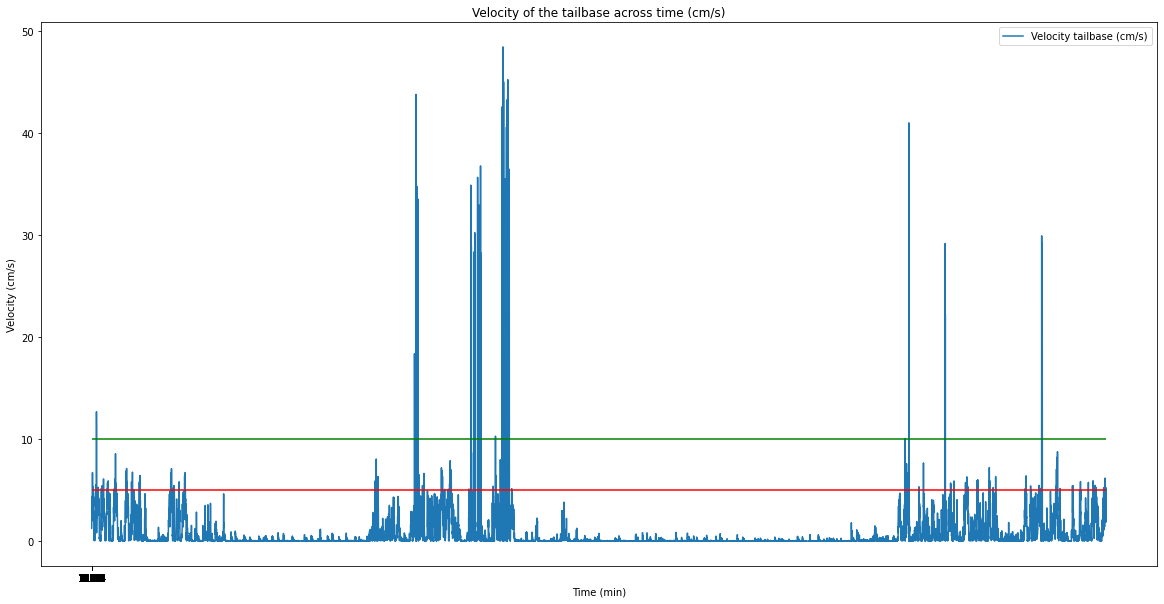

In [54]:
# plot the velocity of a bodypart (hole picture)
import numpy as np
import matplotlib.pyplot as plt

#use .astype() to convert from object to float

df_vel_cms[['Velocity tailbase (cm/s)']].plot(kind='line', 
                        xlabel='Time (min)', 
                        ylabel='Velocity (cm/s)',
                        title='Velocity of the tailbase across time (cm/s)',
                        figsize=(20,10), xticks=df_vel_cms['Time (min)'])
                    

walking_treshold = 5
plt.hlines(walking_treshold, 0, len(df_vel_cms), color='red')

troting_treshold = 10
plt.hlines(troting_treshold, 0, len(df_vel_cms), color='green')

# plot everything in the same figure
plt.show()

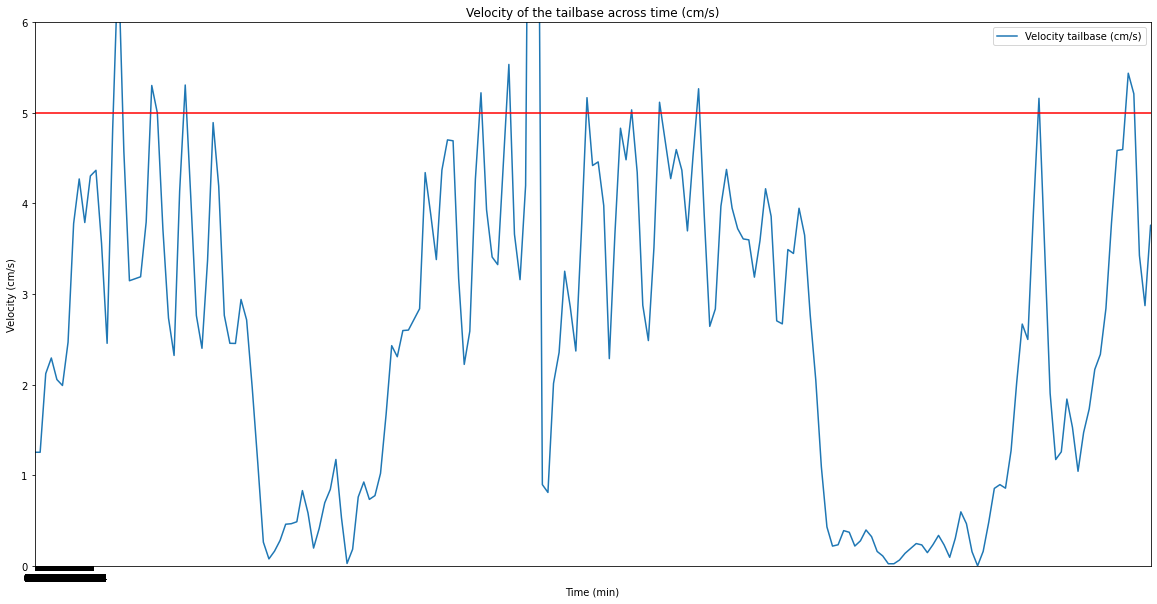

In [56]:
# plot the velocity of a bodypart (show shorter segments)
import numpy as np
import matplotlib.pyplot as plt

#use .astype() to convert from object to float

df_vel_cms[['Velocity tailbase (cm/s)']].plot(kind='line', 
                        xlabel='Time (min)', 
                        ylabel='Velocity (cm/s)',
                        title='Velocity of the tailbase across time (cm/s)',
                        figsize=(20,10), xlim=(0,200), ylim=(0,6), xticks=df_vel_cms['Time (min)'])
                    

walking_treshold = 5
plt.hlines(walking_treshold, 0, len(df_vel_cms), color='red')

troting_treshold = 10
plt.hlines(troting_treshold, 0, len(df_vel_cms), color='green')

# plot everything in the same figure
plt.show()

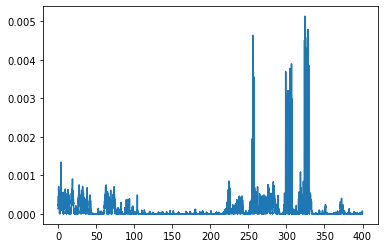

In [123]:
# before applying the low pass filter, one needs to understand what frequencies are present in the signal
# plot the fast fourier transform (fft)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = len(df_vel_cms)
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
y = df_vel_cms[['Velocity tailbase (cm/s)']]
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

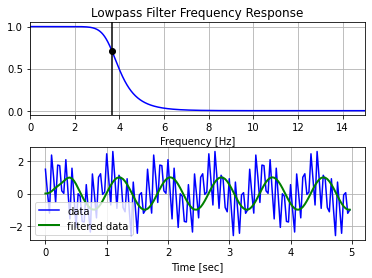

In [122]:
# low pass filter to detect 'walking' periods
import numpy as np
from scipy.signal import butter, lfilter, freqz, filtfilt
from matplotlib import pyplot as plt

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y =  lfilter(b, a, data)
    return y

# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2,1,1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0             # seconds
n = int(T * fs)     # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) \
        + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2,1,2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

filtered_velocity = butter_lowpass_filter(df_vel_cms[['Velocity tailbase (cm/s)']], cutoff, fs, order)

#plt.figure(figsize=(20, 5))
#plt.plot(df_vel_cms[['Velocity tailbase (cm/s)']])
#plt.plot(filtered_velocity)

plt.subplots_adjust(hspace=0.35)
plt.show()

In [110]:
filtered_velocity

array([[0.00117863],
       [0.00117863],
       [0.00199499],
       ...,
       [0.00372906],
       [0.00433919],
       [0.00433919]])

In [111]:
# create a new columns containing the velocity subjected to a low pass filter
df_vel_cms['Filtered Velocity (cm/s)'] = filtered_velocity
# showing the dataframe
df_vel_cms

,Velocity nose (cm/s),Velocity tailbase (cm/s),Time (s),Time (min),Filtered Velocity (cm/s)
0,2.942608,1.253264,0.000000,0.000000,0.001179
1,2.942608,1.253264,0.033333,0.000556,0.001179
2,2.397759,2.121307,0.066667,0.001111,0.001995
3,2.804332,2.293795,0.100000,0.001667,0.002157
4,3.560085,2.055730,0.133333,0.002222,0.001933
...,...,...,...,...,...
18859,3.403010,4.435337,628.633333,10.477222,0.004171
18860,3.475817,4.018757,628.666667,10.477778,0.003779
18861,3.372591,3.965183,628.700000,10.478333,0.003729
18862,2.917872,4.613945,628.733333,10.478889,0.004339


In [129]:
df_vel_cms.sort_values(by='Velocity tailbase (cm/s)')

,Velocity nose (cm/s),Velocity tailbase (cm/s),Time (s),Time (min),Filtered Velocity (cm/s)
13489,0.035296,0.000000,449.633333,7.493889,0.000000
8932,0.074304,0.000000,297.733333,4.962222,0.000000
7134,4.154387,0.000000,237.800000,3.963333,0.000000
18161,0.531890,0.000000,605.366667,10.089444,0.000000
9614,0.019137,0.000000,320.466667,5.341111,0.000000
...,...,...,...,...,...
6030,1.959780,43.754623,201.000000,3.350000,0.041149
7659,0.000000,44.979465,255.300000,4.255000,0.042301
7737,3.281807,45.193062,257.900000,4.298333,0.042502
7646,3.432632,48.341255,254.866667,4.247778,0.045463


<AxesSubplot:title={'center':'Filtered Velocity of the tailbase across time (cm/s)'}, xlabel='Time (s)', ylabel='Filtered Velocity (cm/s)'>

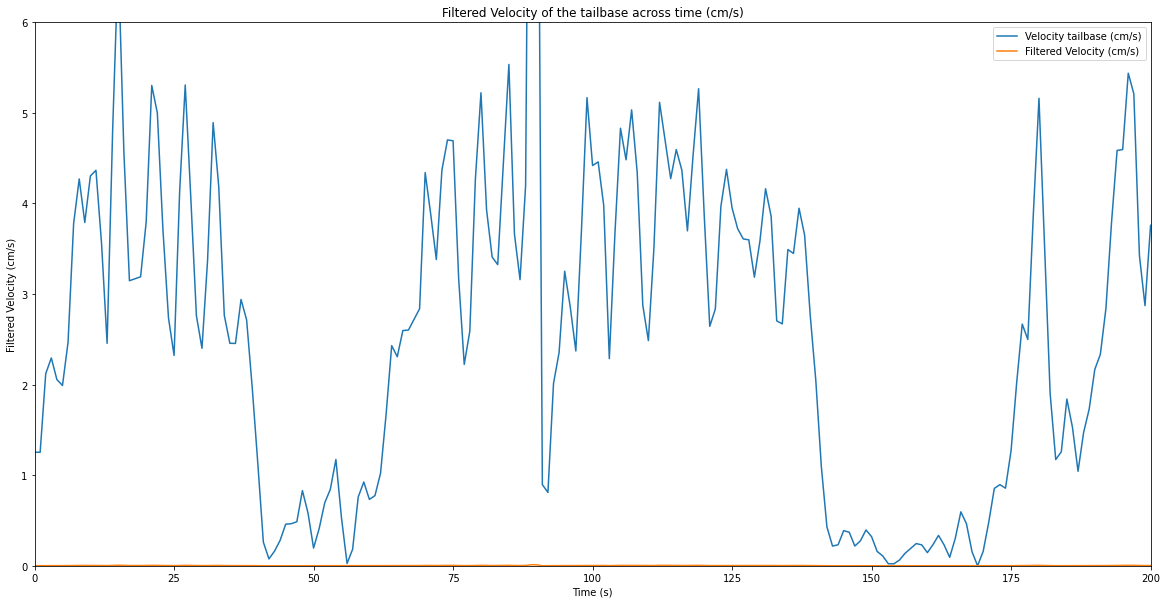

In [112]:
# plot the "raw velocity" and the filtered columns

#takes to much time to plot with the xticks=df_vel_cms['Time (s)']
'''
df_vel_cms[['Velocity tailbase (cm/s)', 'Filtered Velocity (cm/s)']].plot(kind='line', 
                        xlabel='Time (s)', 
                        ylabel='Filtered Velocity (cm/s)',
                        title='Filtered Velocity of the tailbase across time (cm/s)',
                        figsize=(20,10), xlim=(0,200), ylim=(0,6), xticks=df_vel_cms['Time (s)'])
'''
# here I see the first 200 frames (6 sec) 
df_vel_cms[['Velocity tailbase (cm/s)', 'Filtered Velocity (cm/s)']].plot(kind='line', 
                        xlabel='Time (s)', 
                        ylabel='Filtered Velocity (cm/s)',
                        title='Filtered Velocity of the tailbase across time (cm/s)',
                        figsize=(20,10), xlim=(0,200), ylim=(0,6))

Obs: the filter doesn't seem to be working (looks the same, only at a much smaller scale...high frequencies are still there) :/

<AxesSubplot:title={'center':'Filtered Velocity of the tailbase across time (cm/s)'}, xlabel='"Time (s)', ylabel='Filtered Velocity (cm/s)'>

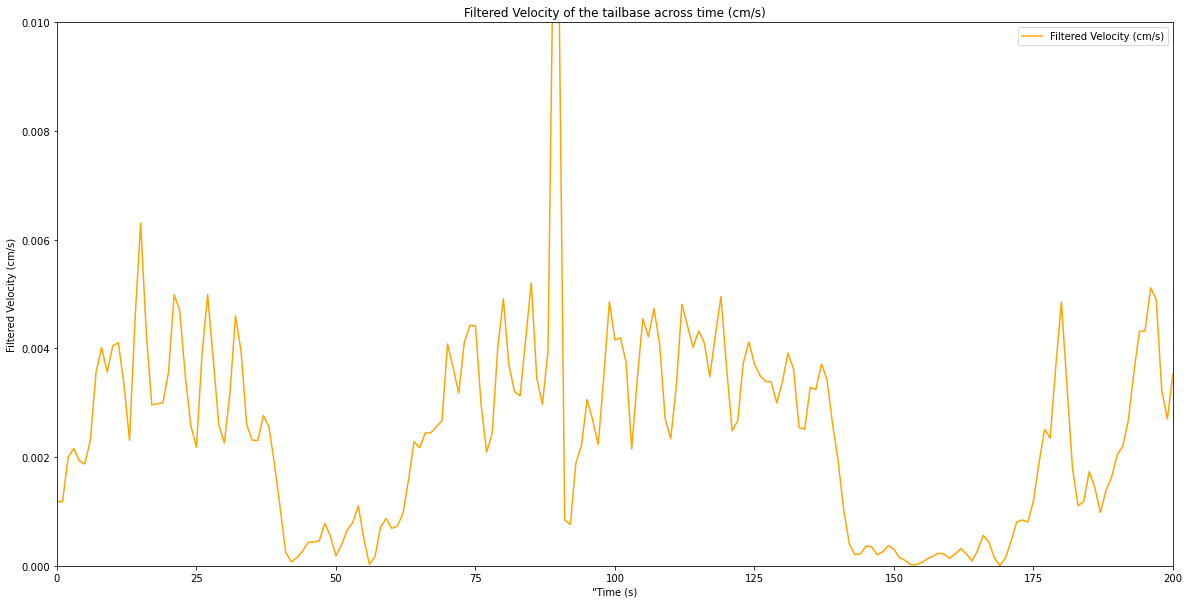

In [118]:
# plot the filtered columns AT A SMALLER SCALE
df_vel_cms[['Filtered Velocity (cm/s)']].plot(kind='line', 
                        xlabel='"Time (s)', 
                        ylabel='Filtered Velocity (cm/s)',
                        title='Filtered Velocity of the tailbase across time (cm/s)',
                        figsize=(20,10), xlim=(0,200), ylim=(0,0.01), color = 'orange')

## Distributions - Histograms 

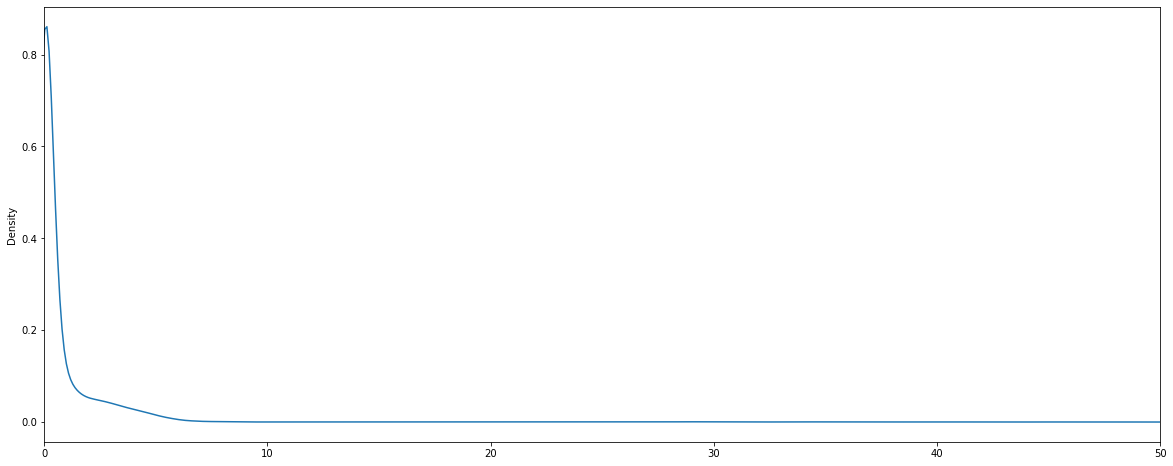

In [131]:
# plot the kernel density estimation
import numpy as np
import matplotlib.pyplot as plt

# only two visible bins
df_vel_cms['Velocity tailbase (cm/s)'].plot(kind='kde', figsize=(20,8), xlim = (0, 50))

# plot everything in the same figure
plt.show()

array([[<AxesSubplot:title={'center':'Velocity tailbase (cm/s)'}>]],
      dtype=object)

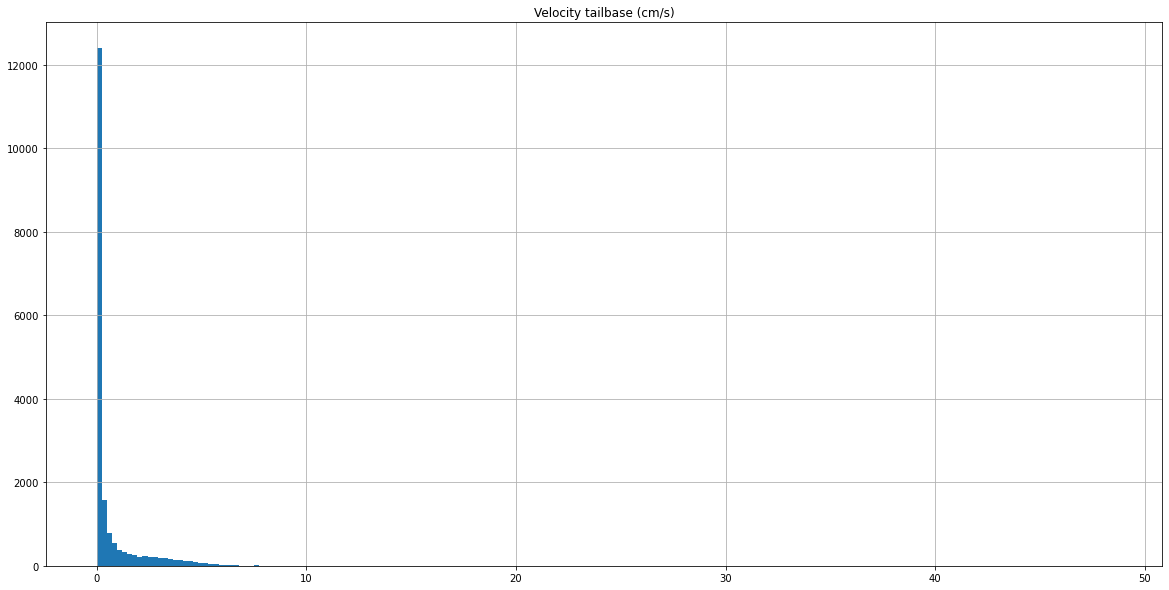

In [138]:
import pandas as pd
import numpy as np
import matplotlib

df_vel_cms.hist(column='Velocity tailbase (cm/s)', bins=200, figsize=(20,10))

## Distplot

In [139]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

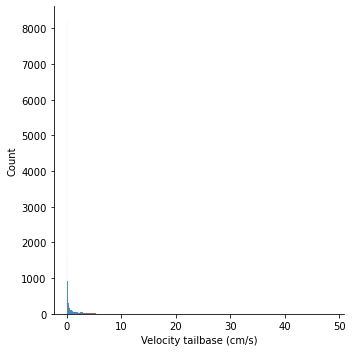

In [140]:
res = sn.displot(df_vel_cms['Velocity tailbase (cm/s)'])
plt.show()

## Percentage of time in each 'gait'

### Considering walking to be 5 cm/s +- 2 and troting to be 15 cm/s +-2... 

Bar Plot

In [220]:
df_vel_cms

,Velocity nose (cm/s),Velocity tailbase (cm/s),Time (s),Time (min),Filtered Velocity (cm/s)
0,2.942608,1.253264,0.000000,0.000000,0.001179
1,2.942608,1.253264,0.033333,0.000556,0.001179
2,2.397759,2.121307,0.066667,0.001111,0.001995
3,2.804332,2.293795,0.100000,0.001667,0.002157
4,3.560085,2.055730,0.133333,0.002222,0.001933
...,...,...,...,...,...
18859,3.403010,4.435337,628.633333,10.477222,0.004171
18860,3.475817,4.018757,628.666667,10.477778,0.003779
18861,3.372591,3.965183,628.700000,10.478333,0.003729
18862,2.917872,4.613945,628.733333,10.478889,0.004339


In [221]:
# count frames where velocity is in each of the intevals
upperl_standing_stil = 1
mean_vel_walking = 5
mean_vel_trot = 15
estimate_deviation = 2
lowerl_walking = mean_vel_walking - estimate_deviation
upperl_walking = mean_vel_walking + estimate_deviation
lowerl_trot = mean_vel_trot - estimate_deviation
upperl_trot = mean_vel_trot + estimate_deviation
bins = [0, upperl_standing_stil, lowerl_walking, upperl_walking, lowerl_trot, upperl_trot, 500]
df_percentage_gait = df_vel_cms['Velocity tailbase (cm/s)'].value_counts(bins=bins, sort=False) 
df_percentage_gait

(-0.001, 1.0]    15341
(1.0, 3.0]        2133
(3.0, 7.0]        1292
(7.0, 13.0]         32
(13.0, 17.0]         0
(17.0, 500.0]       66
Name: Velocity tailbase (cm/s), dtype: int64

In [222]:
df_percentage_gait = pd.DataFrame(df_percentage_gait)
df_percentage_gait

,Velocity tailbase (cm/s)
"(-0.001, 1.0]",15341
"(1.0, 3.0]",2133
"(3.0, 7.0]",1292
"(7.0, 13.0]",32
"(13.0, 17.0]",0
"(17.0, 500.0]",66


In [223]:
# create a columns with time spent in each gate (%)
df_percentage_gait['Time spent (%)'] = df_percentage_gait['Velocity tailbase (cm/s)']/len(df_vel_cms)
df_percentage_gait

,Velocity tailbase (cm/s),Time spent (%)
"(-0.001, 1.0]",15341,0.813242
"(1.0, 3.0]",2133,0.113073
"(3.0, 7.0]",1292,0.068490
"(7.0, 13.0]",32,0.001696
"(13.0, 17.0]",0,0.000000
"(17.0, 500.0]",66,0.003499


In [224]:
df_percentage_gait['Type of Gait'] = ['Standing Still', 'Undefined1', 'Walking', 'Undefined2', 'Troting', 'Undefined3']
df_percentage_gait

,Velocity tailbase (cm/s),Time spent (%),Type of Gait
"(-0.001, 1.0]",15341,0.813242,Standing Still
"(1.0, 3.0]",2133,0.113073,Undefined1
"(3.0, 7.0]",1292,0.068490,Walking
"(7.0, 13.0]",32,0.001696,Undefined2
"(13.0, 17.0]",0,0.000000,Troting
"(17.0, 500.0]",66,0.003499,Undefined3


In [225]:
# put in percentage
df_percentage_gait['Time spent (%)'] = df_percentage_gait['Time spent (%)']*100
df_percentage_gait

,Velocity tailbase (cm/s),Time spent (%),Type of Gait
"(-0.001, 1.0]",15341,81.324215,Standing Still
"(1.0, 3.0]",2133,11.307252,Undefined1
"(3.0, 7.0]",1292,6.849025,Walking
"(7.0, 13.0]",32,0.169635,Undefined2
"(13.0, 17.0]",0,0.000000,Troting
"(17.0, 500.0]",66,0.349873,Undefined3


In [263]:
df_percentage_gait.rename(columns={'Velocity tailbase (cm/s)': '# Frames'}, index={'(-0.001, 1.0]': 'Row_1'}, inplace=True)
df_percentage_gait

,# Frames,Time spent (%),Type of Gait
"(-0.001, 1.0]",15341,81.32,Standing Still
"(1.0, 3.0]",2133,11.31,Undefined1
"(3.0, 7.0]",1292,6.85,Walking
"(7.0, 13.0]",32,0.17,Undefined2
"(13.0, 17.0]",0,0.00,Troting
"(17.0, 500.0]",66,0.35,Undefined3


In [230]:
# round percentages to two decimal cases
df_percentage_gait['Time spent (%)'] = df_percentage_gait['Time spent (%)'].round(decimals=2)

In [231]:
# the same bar plot using seaborn
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [232]:
df_percentage_gait.shape

(6, 3)

In [1]:
bar_plot = sns.barplot(x='Type of Gait', y='Time spent (%)', data=df_percentage_gait,
            palette='Paired')
for i in bar_plot.containers:
    bar_plot.bar_label(i,)
# remove right and top spines from the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

NameError: name 'sns' is not defined